<a href="https://colab.research.google.com/github/aderdouri/ActuarialThesis/blob/master/Notebooks/Comparaison/myAllstateDataAnalysis2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Note` : Le dataset considéré ici est volumineux et ne peux être stocké dans Github, il faut le récupérer à directement du site web de l'organisateur de la compétition, urls :

https://www.kaggle.com/competitions/ClaimPredictionChallenge/data?select=train_set.zip
https://www.kaggle.com/competitions/ClaimPredictionChallenge/data?select=test_set.zip

Au préalable, il faut créer un compte `Kaggle` et avoir un `Token` (stocké dans le fichier `kaggle.json`). On peut aussi faire notre étude d'un dataset directement sur la plateform `Kaggle` (https://www.kaggle.com/).

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!ls -lisa

total 20
6160390 4 drwxr-xr-x 1 root root 4096 Oct 31 07:02 .
5636107 4 drwxr-xr-x 1 root root 4096 Oct 31 06:57 ..
 655367 4 drwxr-xr-x 4 root root 4096 Oct 27 13:22 .config
5636153 4 -rw-r--r-- 1 root root   65 Oct 31 07:02 kaggle.json
6160391 4 drwxr-xr-x 1 root root 4096 Oct 27 13:22 sample_data


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c ClaimPredictionChallenge

100% 619M/622M [00:04<00:00, 155MB/s]
100% 622M/622M [00:04<00:00, 141MB/s]


In [7]:
!ls -ltr

total 636968
-rw-r--r-- 1 root root 652240297 Dec 11  2019 ClaimPredictionChallenge.zip
drwxr-xr-x 1 root root      4096 Oct 27 13:22 sample_data
-rw-r--r-- 1 root root        65 Oct 31 07:02 kaggle.json


In [9]:
!unzip ClaimPredictionChallenge.zip

Archive:  ClaimPredictionChallenge.zip
  inflating: dictionary.html         
  inflating: example_compressed_entry.csv.gz  
  inflating: example_compressed_entry.zip  
  inflating: example_uncompressed_entry.csv  
  inflating: kaggle_srm6_stormod.sas7bitm  
  inflating: test_set.7z             
  inflating: test_set.zip            
  inflating: train_set.7z            
  inflating: train_set.zip           


In [10]:
!ls -ltr

total 1329376
-rw-r--r-- 1 root root   9534348 Dec 11  2019 example_compressed_entry.csv.gz
-rw-r--r-- 1 root root     24768 Dec 11  2019 dictionary.html
-rw-r--r-- 1 root root  51778401 Dec 11  2019 example_uncompressed_entry.csv
-rw-r--r-- 1 root root   5120252 Dec 11  2019 example_compressed_entry.zip
-rw-r--r-- 1 root root  34841099 Dec 11  2019 test_set.7z
-rw-r--r-- 1 root root    325632 Dec 11  2019 kaggle_srm6_stormod.sas7bitm
-rw-r--r-- 1 root root 116285954 Dec 11  2019 test_set.zip
-rw-r--r-- 1 root root 110548523 Dec 11  2019 train_set.7z
-rw-r--r-- 1 root root 380542114 Dec 11  2019 train_set.zip
-rw-r--r-- 1 root root 652240297 Dec 11  2019 ClaimPredictionChallenge.zip
drwxr-xr-x 1 root root      4096 Oct 27 13:22 sample_data
-rw-r--r-- 1 root root        65 Oct 31 07:02 kaggle.json


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
sns.set_theme()

In [12]:
import pandas as pd
train_data = pd.read_csv('/content/train_set.zip', low_memory=False)
train_data.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [13]:
train_data.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [14]:
len(list(train_data.columns))

35

In [15]:
len(train_data)

13184290

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184290 entries, 0 to 13184289
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Row_ID          int64  
 1   Household_ID    int64  
 2   Vehicle         int64  
 3   Calendar_Year   int64  
 4   Model_Year      int64  
 5   Blind_Make      object 
 6   Blind_Model     object 
 7   Blind_Submodel  object 
 8   Cat1            object 
 9   Cat2            object 
 10  Cat3            object 
 11  Cat4            object 
 12  Cat5            object 
 13  Cat6            object 
 14  Cat7            object 
 15  Cat8            object 
 16  Cat9            object 
 17  Cat10           object 
 18  Cat11           object 
 19  Cat12           object 
 20  OrdCat          object 
 21  Var1            float64
 22  Var2            float64
 23  Var3            float64
 24  Var4            float64
 25  Var5            float64
 26  Var6            float64
 27  Var7            float64
 28  Var8      

In [17]:
train_data.describe()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
count,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07
mean,6.592146e+06,4.128242e+06,1.894002e+00,2.006052e+03,1.999312e+03,-1.011925e-02,-6.508702e-02,-2.543391e-02,-5.456792e-02,3.838594e-03,-4.012271e-02,-2.421288e-02,-5.856059e-02,1.468410e-02,1.751169e-02,1.354226e-02,1.851376e-02,1.360658e+00
std,3.805977e+06,2.248415e+06,1.173861e+00,8.123720e-01,5.211866e+00,9.800609e-01,9.684165e-01,1.018902e+00,9.680170e-01,9.910490e-01,9.792078e-01,1.006433e+00,1.003954e+00,1.031040e+00,1.038212e+00,1.027748e+00,1.034274e+00,3.900103e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.005000e+03,1.981000e+03,-2.578222e+00,-2.493393e+00,-2.790335e+00,-2.508216e+00,-3.350344e+00,-2.376657e+00,-2.778491e+00,-2.163042e+00,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
25%,3.296073e+06,2.184932e+06,1.000000e+00,2.005000e+03,1.996000e+03,-6.658971e-01,-8.161519e-01,-8.696874e-01,-7.830189e-01,-6.860239e-01,-6.887650e-01,-8.984857e-01,-6.517680e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
50%,6.592146e+06,4.257083e+06,2.000000e+00,2.006000e+03,2.000000e+03,-3.123581e-01,-1.245062e-01,-2.217581e-01,-1.064709e-01,-1.150981e-01,-2.372568e-01,-4.684193e-01,-2.568567e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
75%,9.888218e+06,6.281433e+06,2.000000e+00,2.007000e+03,2.003000e+03,4.429298e-01,4.806838e-01,7.269956e-01,4.855086e-01,5.331405e-01,4.973212e-01,8.217801e-01,3.409799e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
max,1.318429e+07,7.542113e+06,2.900000e+01,2.007000e+03,2.009000e+03,5.143392e+00,7.829420e+00,5.563325e+00,7.589263e+00,4.018167e+00,4.584289e+00,4.127148e+00,4.735074e+01,6.627110e+00,8.883081e+00,8.691144e+00,6.388802e+00,1.144075e+04


## Analyse de la variable cible (Target variable)

In [ ]:
100*len(train_data[train_data['Claim_Amount']>0]) / len(train_data)

0.7251433334673312

## Remarque:
Uniquement `0.73%` des montants de sinistres sont strictement supérieurs à zéros.

In [ ]:
100*len(train_data[train_data['Claim_Amount']==0]) / len(train_data)

99.27485666653267

## Remarque:
`99.3%` des montants de sinistres sont égales à zéros.

In [18]:
a = train_data['Claim_Amount'].skew()
print('Skewness of Claim_Amount feature is :', a)

Skewness of Claim_Amount feature is : 70.72036466134124


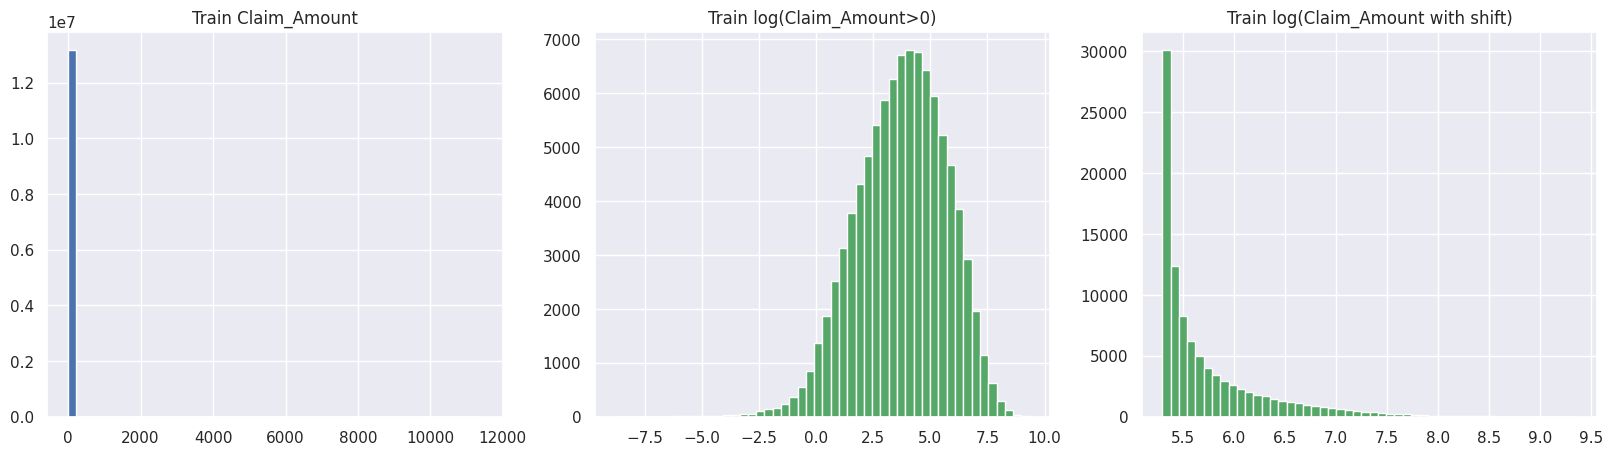

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20, 5)

ax1.hist(train_data['Claim_Amount'], bins=50)
ax1.set_title('Train Claim_Amount')

ax2.hist(np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount']), bins=50, color='g')
ax2.set_title('Train log(Claim_Amount>0)')

ax3.hist(np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount']+200), bins=50, color='g')
ax3.set_title('Train log(Claim_Amount with shift)')
plt.savefig('./myHistogramAllstate2012.pdf')
plt.show();

In [20]:
train_data_greater_zeros = train_data[train_data['Claim_Amount']>0]

## Remarque:
* Nous pouvons remarquer qu'il y a plusieurs pics dans le graphe de la caractéristique de perte, ce qui représente une perte énorme à un moment donné.
* Comme nous remarquons de nombreux pics, nous pouvons dire que les données réelles de cette caractéristique sont biaisées (skewed), ce qui peut entraîner une performance sous-optimale des modèles de régression que nous construisons.
* Les données asymétriques (désiquilibrés) ont une incidence considérable sur vos performances.

## Calculate skewness and see how we can reduce skewness.

In [21]:
a = train_data['Claim_Amount'].skew()
print('Skewness of Claim_Amount feature is :',a)

Skewness of Claim_Amount feature is : 70.72036466134124


In [22]:
train_data['logloss'] = np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount'])
print('Skewness of Claim_Amount feature after applying log function :', train_data['logloss'].skew())
train_data = train_data.drop(['logloss'],axis = 1)

Skewness of Claim_Amount feature after applying log function : -0.3856457407474764


## Box plot of target variable

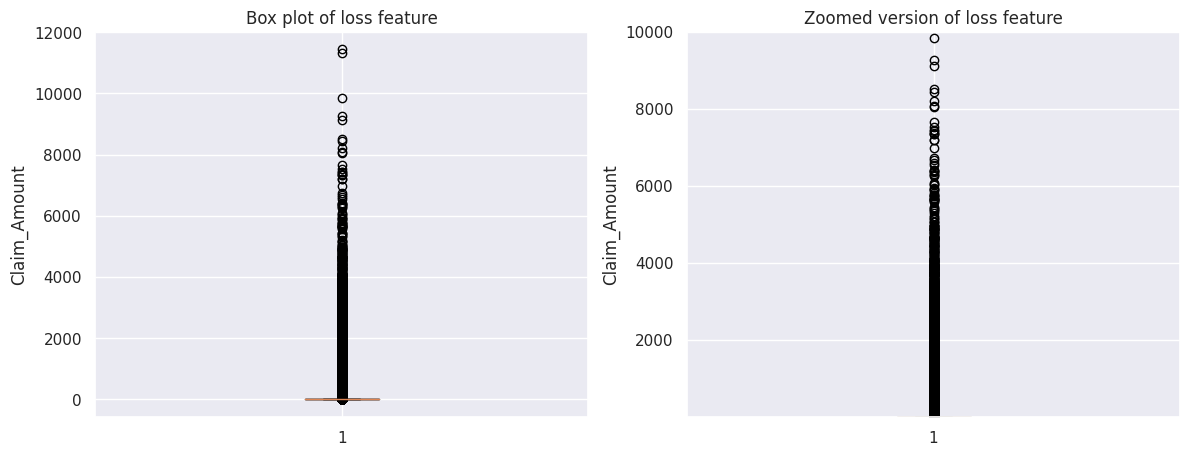

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_size_inches(14,5)
ax1.boxplot(train_data['Claim_Amount'])
ax1.set_ylabel('Claim_Amount')
ax1.set_title('Box plot of loss feature')

#values = uniq_values_in_categories[uniq_values_in_categories.unique_values <= 25].unique_values
ax2.set_ylim(1, 10000)
ax2.boxplot(train_data['Claim_Amount'])
ax2.set_ylabel('Claim_Amount')
ax2.set_title('Zoomed version of loss feature')
plt.savefig('./myBoxplotAllstate2012.pdf');